<h1><center>Box-Office Revenue Prediction

<h3>Problem Statement</h3>
<ul>
    <li> Form a linear realtionship between production cost and the revenue generated in box-office movies</li>
    <li> Predict revenue taking production cost as the input</li>
</ul>

In [24]:
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data=pandas.read_csv('cost_revenue.csv')

In [4]:
data

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527
...,...,...
5029,225000000,1519479547
5030,215000000,1671640593
5031,306000000,2058662225
5032,200000000,2207615668


In [5]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [6]:
data.shape

(5034, 2)

In [32]:
X=data['production_budget_usd'].values.reshape(-1,1)
Y=data['worldwide_gross_usd'].values.reshape(-1,1)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

<h3>Exploratory Data Analysis</h3>

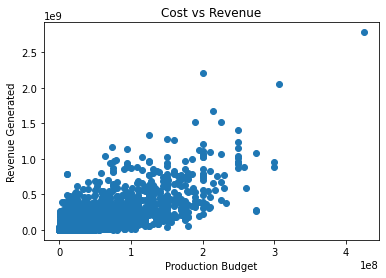

In [34]:
plt.scatter(X,Y)
plt.title('Cost vs Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Revenue Generated')
plt.show()

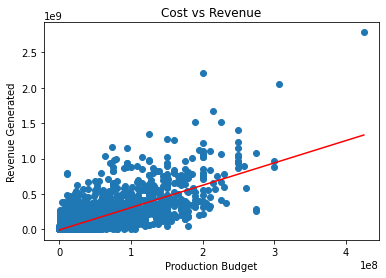

In [45]:
plt.scatter(X,Y)
plt.title('Cost vs Revenue')
plt.plot(X,regression.predict(X), color='red')
plt.xlabel('Production Budget')
plt.ylabel('Revenue Generated')
plt.show()

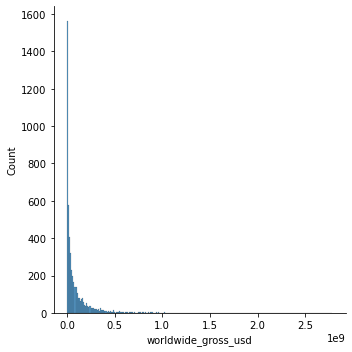

In [35]:
seabornInstance.displot(data['worldwide_gross_usd'])
plt.show()

<h3>Train Algorithm and Build Model</h3>


In [36]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [37]:
print('Intercept: ',regression.intercept_)

Intercept:  [-8899121.11600485]


In [38]:
print('Coefficient: ',regression.coef_)

Coefficient:  [[3.15494673]]


<h3>Predictions</h3>

In [39]:
Y_pred=regression.predict(X_test)

In [40]:
df=DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})

In [41]:
df

,Actual,Predicted
0,50334418,1.791793e+07
1,1840248,-4.166701e+06
2,1308696,9.205917e+07
3,213514672,3.842508e+07
4,90396664,7.312949e+07
...,...,...
1002,418186950,4.801176e+08
1003,51445503,5.419981e+07
1004,74787599,8.574928e+07
1005,90523726,1.330735e+08


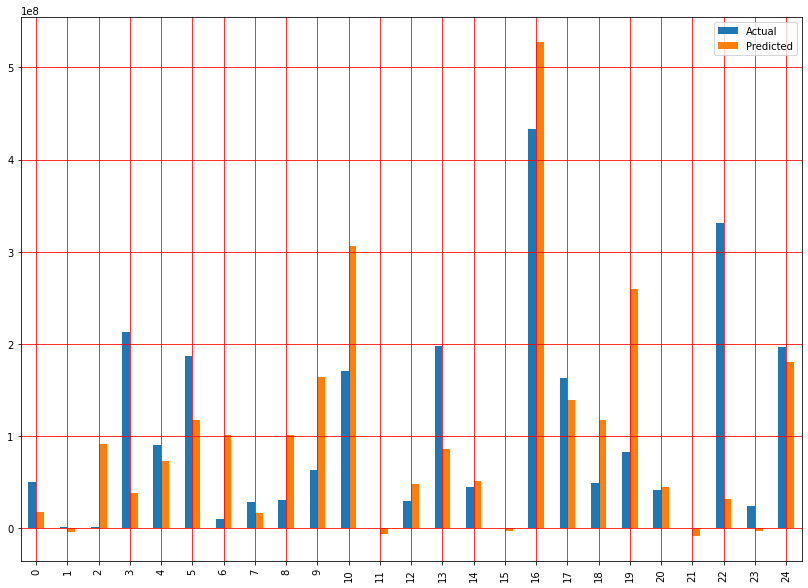

In [44]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(14,10))
plt.grid(which='major',linestyle='-',color='red')
plt.grid(which='minor',linestyle='-',color='green')
plt.show()

<h3>Evaluate the performance of building model</h3>


In [47]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error: ',numpy.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error:  59370501.962122835
Mean Squared Error:  1.233586845112215e+16
Root Mean Squared Error:  111066954.81160069
